In [2]:
import lifelines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter as KM
from lifelines.statistics import logrank_test

data = load_data()

**Understanding the Data**

**Stage_group**: (1: Stage III Lymphoma Cancer, 2: Stage IV Lymphoma Cancer)

---


**Time**: Observation time before death(In Months)

---





**Event**: (0: Patient didn't die during observation period, 1: Patient died)

In [15]:
data.head()

,Stage_group,Time,Event
0,1,6,1
1,1,19,1
2,1,32,1
3,1,42,1
4,1,42,1


(80, 3)
[1 2]


Text(0, 0.5, 'Number of patients')

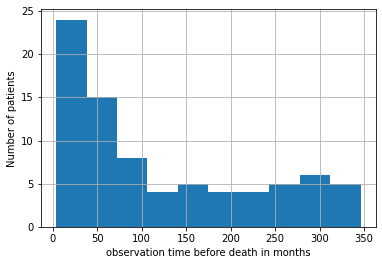

In [14]:
print(data.shape)
print(data['Stage_group'].unique())
data.Time.hist()
plt.xlabel('observation time before death in months')
plt.ylabel('Number of patients')

Survival function:

$$
S(t) = P(T > t)
$$

To illustrate the strengths of Kaplan Meier, we'll start with a naive estimator of the above survival function. To estimate this quantity, we'll divide the number of people who we know lived past time $t$ by the number of people who were not censored before $t$.

Formally, let $i$ = 1, ..., $n$ be the cases, and let $t_i$ be the time when $i$ was censored or an event happened. Let $e_i= 1$ if an event was observed for $i$ and 0 otherwise. Then let $X_t = \{i : T_i > t\}$, and let $M_t = \{i : e_i = 1 \text{ or } T_i > t\}$. The estimator:

$$
\hat{S}(t) = \frac{|X_t|}{|M_t|}
$$

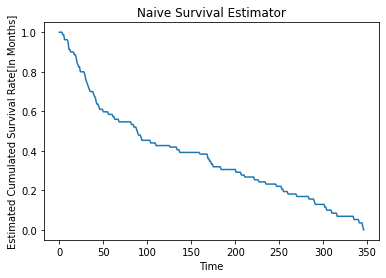

In [5]:
def naive_estimator(t, df):
    
    s_t = 0.0
    X_t = len(df[df['Time'] > t])
    M_t = len(df[(df['Time'] > t) | df['Event'] == 1])
    S_t = X_t / M_t
    
    return S_t

max_time = data.Time.max()
x = range(0, max_time+1)
y = np.zeros(len(x))

for i,t in enumerate(x):
    y[i] = naive_estimator(t, data)
    
plt.plot(x, y)
plt.title('Naive Survival Estimator')
plt.xlabel('Time')
plt.ylabel('Estimated Cumulated Survival Rate[In Months]')
plt.show()

Next let's compare this with the Kaplan Meier estimate. 

The Kaplan-Meier estimate:

$$
S(t) = \prod_{t_i \leq t} (1 - \frac{d_i}{n_i})
$$

where $t_i$ are the events observed in the dataset and $d_i$ is the number of deaths at time $t_i$ and $n_i$ is the number of people who we know have survived up to time $t_i$.

Text(0, 0.5, 'Survival probability Estimate')

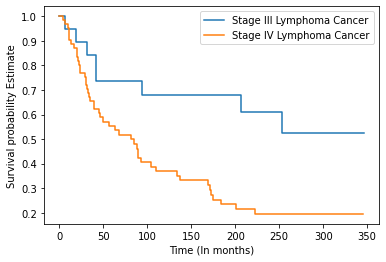

In [6]:
S1 = data[data.Stage_group == 1]
km1 = KM()
km1.fit(S1.loc[:, 'Time'], event_observed = S1.loc[: , 'Event'], label = 'Stage III Lymphoma Cancer')

S2 = data[data.Stage_group == 2]
km2 = KM()
km2.fit(S2.loc[:, 'Time'], event_observed = S2.loc[: , 'Event'], label = 'Stage IV Lymphoma Cancer') 

ax = km1.plot(ci_show =False) 
km2.plot(ax = ax, ci_show = False)
plt.xlabel('Time (In months)')
plt.ylabel('Survival probability Estimate')

In [17]:
survivals = pd.DataFrame([24,60,120,240], columns = ['time'])
survivals.loc[:, 'Group 1(Stage III)'] = km1.survival_function_at_times(survivals['time']).values
survivals.loc[:, "Group 2(Stage IV)"] = km2.survival_function_at_times(survivals['time']).values
print('Survival Probabilities:')
print('\n')
survivals

Survival Probabilities:




,time,Group 1(Stage III),Group 2(Stage IV)
0,24,0.894737,0.770492
1,60,0.736842,0.553734
2,120,0.680162,0.369156
3,240,0.612146,0.195436


Above table illustrates **survival probabilities** of patients suffering from Stage III and stage IV 'Lymphoma Cancer' at given time in future (i.e. 24, 60, 120, 240 months)

This can help the Insurance companies to recommend a particular policy plan.